In [283]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/balajivijayaraj/Library/Python/3.10/lib/python/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['source']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [284]:
from sklearn.tree import DecisionTreeClassifier

In [285]:
def getTrainingData(songStrings, nrOfSongs):
    notes = list("ABCDEFGHI")
    chord = [[0], [1], [2], [3], [4], [5], [6], [7],[8]]
    source = []
    target = []
    for s in range(nrOfSongs):
        for i in range(42):
            sentence = []
            answer = []
            for j in range(4):
                sentence.append(chord[notes.index(songStrings[s][(i+j)%42])][0])
                answer.append(chord[notes.index(songStrings[s][(i+j+1)%42])][0])
            source.append(sentence)
            target.append(answer)
    return np.array(source), np.array(target)

In [79]:
# Data generation and preparation
songStrings = np.array([
     "ABCDEFGHIABCDEFGHIABCDEFGHIABCDEFGHIABCDEF",
    "ABCDEFIGHABCDEFIGHABCDEFIGHABCDEFIGHABCDEF"
])

source, target = getTrainingData(songStrings, 2)

In [80]:
len(target)

84

In [82]:
# Simulating the I and O arrays with random data for demonstration

# Flattening and printing I and O arrays
for i in range(84):
    print(f"I[{i}].flatten(): {source[i].flatten()}, O[{i}].flatten(): {target[i].flatten()}")

# Checking the size of O and I
I_sizes = [arr.size for arr in source]
O_sizes = [arr.size for arr in target]
I_sizes, O_sizes

I[0].flatten(): [0 1 2 3], O[0].flatten(): [1 2 3 4]
I[1].flatten(): [1 2 3 4], O[1].flatten(): [2 3 4 5]
I[2].flatten(): [2 3 4 5], O[2].flatten(): [3 4 5 6]
I[3].flatten(): [3 4 5 6], O[3].flatten(): [4 5 6 7]
I[4].flatten(): [4 5 6 7], O[4].flatten(): [5 6 7 8]
I[5].flatten(): [5 6 7 8], O[5].flatten(): [6 7 8 0]
I[6].flatten(): [6 7 8 0], O[6].flatten(): [7 8 0 1]
I[7].flatten(): [7 8 0 1], O[7].flatten(): [8 0 1 2]
I[8].flatten(): [8 0 1 2], O[8].flatten(): [0 1 2 3]
I[9].flatten(): [0 1 2 3], O[9].flatten(): [1 2 3 4]
I[10].flatten(): [1 2 3 4], O[10].flatten(): [2 3 4 5]
I[11].flatten(): [2 3 4 5], O[11].flatten(): [3 4 5 6]
I[12].flatten(): [3 4 5 6], O[12].flatten(): [4 5 6 7]
I[13].flatten(): [4 5 6 7], O[13].flatten(): [5 6 7 8]
I[14].flatten(): [5 6 7 8], O[14].flatten(): [6 7 8 0]
I[15].flatten(): [6 7 8 0], O[15].flatten(): [7 8 0 1]
I[16].flatten(): [7 8 0 1], O[16].flatten(): [8 0 1 2]
I[17].flatten(): [8 0 1 2], O[17].flatten(): [0 1 2 3]
I[18].flatten(): [0 1 2 3], O[

([4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4],
 [4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4])

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
import numpy as np

def getTrainingData(songStrings, nrOfSongs):
    notes = list("ABCDEFGHI")
    chord = [[0], [1], [2], [3], [4], [5], [6], [7], [8]]
    source = []
    target = []
    for s in range(nrOfSongs):
        for i in range(42):
            sentence = []
            answer = []
            for j in range(4):
                sentence.append(chord[notes.index(songStrings[s][(i+j)%42])][0])
                answer.append(chord[notes.index(songStrings[s][(i+j+1)%42])][0])
            source.append(sentence)
            target.append(answer)
    return np.array(source), np.array(target)

# Data generation and preparation
songStrings = np.array([
    "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC",
])

source, target = getTrainingData(songStrings, 1)

# Using MultiOutputClassifier
tree = DecisionTreeClassifier()
wrapper = MultiOutputClassifier(tree)
wrapper.fit(source, target)

# Evaluate the model
print(wrapper.score(source, target))


0.9285714285714286


In [13]:
(42-1)/42

0.9761904761904762

## Training and testing on same song or same combination of songs

In [ ]:
def getTrainingData(songStrings, nrOfSongs):
    notes = list("ABCDEFGHI")
    chord = [[0], [1], [2], [3], [4], [5], [6], [7], [8]]
    source = []
    target = []
    for s in range(nrOfSongs):
        for i in range(42):
            sentence = []
            answer = []
            for j in range(4):
                sentence.append(chord[notes.index(songStrings[s][(i+j)%42])][0])
                answer.append(chord[notes.index(songStrings[s][(i+j+1)%42])][0])
            source.append(sentence)
            target.append(answer)
    return np.array(source), np.array(target)

In [60]:
def train_and_evaluate(source, target):
    # Initialize and train the model
    tree = DecisionTreeClassifier()
    wrapper = MultiOutputClassifier(tree)
    wrapper.fit(source, target)
    
    # Evaluate the model
    score = wrapper.score(source, target)
    return score

In [92]:
# Assuming the `process_songs` function is defined as before
# Data generation and preparation
songStrings = np.array([
    "ABCDAFGHIEBCDEAGHIAFCDEFIHIABADEFGCIABCBEF",
    "ABCDEFGHIABCDEFGHIABCDEFGHIABCDEFGHIABCDEF"
])

source, target = getTrainingData(songStrings, 2)
print(len(source))

# Train the classifier and get the score
training_score = train_and_evaluate(source, target)

print("Training Accuracy:", training_score)

84
Training Accuracy: 0.8928571428571429


In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from itertools import combinations_with_replacement
import numpy as np

def getTrainingData(songSequences, nrOfSongs):
    notes = list("ABCDEFGHI")
    chord = [[0], [1], [2], [3], [4], [5], [6], [7], [8]]
    source = []
    target = []
    for s in range(nrOfSongs):
        for i in range(42):
            sentence = []
            answer = []
            for j in range(4):
                sentence.append(chord[notes.index(songSequences[s][(i+j)%42])][0])
                answer.append(chord[notes.index(songSequences[s][(i+j+1)%42])][0])
            source.append(sentence)
            target.append(answer)
    return np.array(source), np.array(target)

def train_and_evaluate(source, target):
    # Initialize and train the model
    tree = DecisionTreeClassifier()
    wrapper = MultiOutputClassifier(tree)
    wrapper.fit(source, target)
    
    # Evaluate the model
    score = wrapper.score(source, target)
    return score

# List of songs with names
songs = [
    ("Normal", "ABCDEFGHIABCDEFGHIABCDEFGHIABCDEFGHIABCDEF"),
    ("Reverse", "IHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFED"),
    ("Daisy Bells", "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC"),
    ("IGH Contradiction", "ABCDEFIGHABCDEFIGHABCDEFIGHABCDEFIGHABCDEF"),
    ("5th Note Different", "ABCDAFGHIEBCDEAGHIAFCDEFIHIABADEFGCIABCBEF"),
    ("Every 2nd Note Different", "AHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFED"),
]

# Process combinations of songs including each song with itself
for combo in combinations_with_replacement(songs, 2):
    song_sequences = [combo[0][1], combo[1][1]]  # Extract the sequences
    inputs, outputs = getTrainingData(np.array(song_sequences), 2)
    if inputs.size and outputs.size:
        training_score = train_and_evaluate(inputs, outputs)
        song_names = (combo[0][0], combo[1][0])
        print("Training Accuracy for pair of songs:", song_names, "is", training_score)


Training Accuracy for pair of songs: ('Normal', 'Normal') is 0.9761904761904762
Training Accuracy for pair of songs: ('Normal', 'Reverse') is 0.9761904761904762
Training Accuracy for pair of songs: ('Normal', 'Daisy Bells') is 0.9523809523809523
Training Accuracy for pair of songs: ('Normal', 'IGH Contradiction') is 0.9285714285714286
Training Accuracy for pair of songs: ('Normal', '5th Note Different') is 0.8928571428571429
Training Accuracy for pair of songs: ('Normal', 'Every 2nd Note Different') is 0.9761904761904762
Training Accuracy for pair of songs: ('Reverse', 'Reverse') is 0.9761904761904762
Training Accuracy for pair of songs: ('Reverse', 'Daisy Bells') is 0.9523809523809523
Training Accuracy for pair of songs: ('Reverse', 'IGH Contradiction') is 0.9761904761904762
Training Accuracy for pair of songs: ('Reverse', '5th Note Different') is 0.9880952380952381
Training Accuracy for pair of songs: ('Reverse', 'Every 2nd Note Different') is 0.9761904761904762
Training Accuracy for

## Training on song 1 and testing on song 2


In [92]:
# #training on song 1 and testing on song 2
# def train_on_song1_test_on_song2(song1, song2):
#     # Function to generate inputs and outputs from a song
#     def generate_features_from_song(song):
#         ins = []
#         outs = []
#         DB = list(song)
#         for i in range(42):
#             I = [ord(DB[(i + j) % len(DB)]) for j in range(4)]
#             outs.append(ord(DB[(i + 4) % len(DB)]))
#             ins.append(I)
#         return ins, outs

#     # Generate features from both songs
#     inputs_song1, outputs_song1 = generate_features_from_song(song1)
#     inputs_song2, outputs_song2 = generate_features_from_song(song2)

#     # Initialize and train a Decision Tree Classifier on Song 1
#     dtc = DecisionTreeClassifier()
#     dtc.fit(inputs_song1, outputs_song1)

#     # Test the classifier on Song 2
#     test_accuracy = dtc.score(inputs_song2, outputs_song2)

#     return dtc, test_accuracy

# # Example songs
# song1 = "ABCDEFGHIABCDEFGHIABCDEFGHIABCDEFGHIABCDEF"
# song2 = "AHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFED"

# # Train on Song 1 and test on Song 2
# classifier, accuracy = train_on_song1_test_on_song2(song1, song2)
# print("Test Accuracy on Song 2:", accuracy)


Test Accuracy on Song 2: 0.23809523809523808


In [95]:
def getTrainingData(songSequences, nrOfSongs):
    notes = list("ABCDEFGHI")
    chord = [[0], [1], [2], [3], [4], [5], [6], [7], [8]]
    source = []
    target = []
    for s in range(nrOfSongs):
        for i in range(42):
            sentence = []
            answer = []
            for j in range(4):
                sentence.append(chord[notes.index(songSequences[s][(i+j)%42])][0])
                answer.append(chord[notes.index(songSequences[s][(i+j+1)%42])][0])
            source.append(sentence)
            target.append(answer)
    return np.array(source), np.array(target)

In [148]:
from sklearn.tree import DecisionTreeClassifier

def train_on_song1_test_on_song2(features_song1, labels_song1, features_song2, labels_song2):
    # Initialize and train a Decision Tree Classifier on Song 1
    tree = DecisionTreeClassifier()
    wrapper = MultiOutputClassifier(tree)
    wrapper.fit(features_song1, labels_song1)
    

    # Test the classifier on Song 2
    test_accuracy = wrapper.score(features_song2, labels_song2)

    return wrapper, test_accuracy



In [219]:
# Example songs
song1 = "ABCDEFGHIABCDEFGHIABCDEFGHIABCDEFGHIABCDEF"
song2 = "ABCDEFIGHABCDEFIGHABCDEFIGHABCDEFIGHABCDEF"

# Generate features from both songs by passing them in an array
inputs_song1, outputs_song1 = getTrainingData([song1], 1)
inputs_song2, outputs_song2 = getTrainingData([song2], 1)

# Train on Song 1 and test on Song 2
classifier, accuracy = train_on_song1_test_on_song2(inputs_song1, outputs_song1, inputs_song2, outputs_song2)
print("Test Accuracy on Song 2:", accuracy)

Test Accuracy on Song 2: 0.5952380952380952


In [34]:
inputs_song2

[[65, 72, 67, 70],
 [72, 67, 70, 69],
 [67, 70, 69, 68],
 [70, 69, 68, 71],
 [69, 68, 71, 66],
 [68, 71, 66, 73],
 [71, 66, 73, 65],
 [66, 73, 65, 72],
 [73, 65, 72, 67],
 [65, 72, 67, 70],
 [72, 67, 70, 69],
 [67, 70, 69, 68],
 [70, 69, 68, 71],
 [69, 68, 71, 66],
 [68, 71, 66, 73],
 [71, 66, 73, 65],
 [66, 73, 65, 72],
 [73, 65, 72, 67],
 [65, 72, 67, 70],
 [72, 67, 70, 69],
 [67, 70, 69, 68],
 [70, 69, 68, 71],
 [69, 68, 71, 66],
 [68, 71, 66, 73],
 [71, 66, 73, 65],
 [66, 73, 65, 72],
 [73, 65, 72, 67],
 [65, 72, 67, 70],
 [72, 67, 70, 69],
 [67, 70, 69, 68],
 [70, 69, 68, 71],
 [69, 68, 71, 66],
 [68, 71, 66, 73],
 [71, 66, 73, 65],
 [66, 73, 65, 72],
 [73, 65, 72, 67],
 [65, 72, 67, 70],
 [72, 67, 70, 69],
 [67, 70, 69, 68],
 [70, 69, 68, 65],
 [69, 68, 65, 72],
 [68, 65, 72, 67]]

In [35]:
outputs_song2

[69,
 68,
 71,
 66,
 73,
 65,
 72,
 67,
 70,
 69,
 68,
 71,
 66,
 73,
 65,
 72,
 67,
 70,
 69,
 68,
 71,
 66,
 73,
 65,
 72,
 67,
 70,
 69,
 68,
 71,
 66,
 73,
 65,
 72,
 67,
 70,
 69,
 68,
 65,
 72,
 67,
 70]

In [225]:
from sklearn.tree import DecisionTreeClassifier
import itertools

# Define the song strings
songs = [
    "ABCDEFGHIABCDEFGHIABCDEFGHIABCDEFGHIABCDEF",  # normal
    "IHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFED",  # reverse
    "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC",  # daisy bells
    "ABCDEFIGHABCDEFIGHABCDEFIGHABCDEFIGHABCDEF",  # igh contradiction
    "ABCDAFGHIEBCDEAGHIAFCDEFIHIABADEFGCIABCBEF",  # 5th note different
    "AHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFED"   # every 2nd note different
]

def generate_features_from_song(song):
    ins = []
    outs = []
    DB = list(song)
    for i in range(42):
        I = [ord(DB[(i + j) % len(DB)]) for j in range(4)]
        outs.append(ord(DB[(i + 4) % len(DB)]))
        ins.append(I)
    return ins, outs

def train_and_test_classifier(train_song, test_song):
    inputs_train, outputs_train = generate_features_from_song(train_song)
    inputs_test, outputs_test = generate_features_from_song(test_song)

    # Initialize and train the Decision Tree Classifier
    dtc = DecisionTreeClassifier(random_state=40)
    dtc.fit(inputs_train, outputs_train)

    # Test the classifier on the second song
    test_accuracy = dtc.score(inputs_test, outputs_test)
    
    return test_accuracy

# Store results in a dictionary
results = {}
for train_idx, test_idx in itertools.product(range(len(songs)), repeat=2):
    #if train_idx != test_idx:  # Optional: remove if self-comparison is desired
        train_song = songs[train_idx]
        test_song = songs[test_idx]
        accuracy = train_and_test_classifier(train_song, test_song)
        results[(train_idx, test_idx)] = accuracy

# Display results
for key, value in results.items():
    print(f"Training on Song {key[0]+1} and testing on Song {key[1]+1}: Accuracy = {value:.2f}")


Training on Song 1 and testing on Song 1: Accuracy = 0.98
Training on Song 1 and testing on Song 2: Accuracy = 0.00
Training on Song 1 and testing on Song 3: Accuracy = 0.12
Training on Song 1 and testing on Song 4: Accuracy = 0.79
Training on Song 1 and testing on Song 5: Accuracy = 0.38
Training on Song 1 and testing on Song 6: Accuracy = 0.24
Training on Song 2 and testing on Song 1: Accuracy = 0.00
Training on Song 2 and testing on Song 2: Accuracy = 0.98
Training on Song 2 and testing on Song 3: Accuracy = 0.00
Training on Song 2 and testing on Song 4: Accuracy = 0.10
Training on Song 2 and testing on Song 5: Accuracy = 0.07
Training on Song 2 and testing on Song 6: Accuracy = 0.10
Training on Song 3 and testing on Song 1: Accuracy = 0.00
Training on Song 3 and testing on Song 2: Accuracy = 0.02
Training on Song 3 and testing on Song 3: Accuracy = 0.93
Training on Song 3 and testing on Song 4: Accuracy = 0.00
Training on Song 3 and testing on Song 5: Accuracy = 0.10
Training on So

In [236]:
from sklearn.tree import DecisionTreeClassifier
import itertools
import numpy as np

songs = [
    "ABCDEFGHIABCDEFGHIABCDEFGHIABCDEFGHIABCDEF",  # Normal
    "IHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFED",  # Reverse
    "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC",  # Daisy bells
    "ABCDEFIGHABCDEFIGHABCDEFIGHABCDEFIGHABCDEF",  # IGH contradiction
    "ABCDAFGHIEBCDEAGHIAFCDEFIHIABADEFGCIABCBEF",  # 5th note different
    "AHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFED"   # Every 2nd note different
]

def generate_features_from_song(song):
    ins = []
    outs = []
    DB = list(song)
    for i in range(42):
        I = [ord(DB[(i + j) % len(DB)]) for j in range(4)]
        outs.append(ord(DB[(i + 4) % len(DB)]))
        ins.append(I)
    return ins, outs

def train_and_test_classifier(train_song, test_song):
    inputs_train, outputs_train = generate_features_from_song(train_song)
    inputs_test, outputs_test = generate_features_from_song(test_song)

    # Split the training set
    train_split_idx = int(0.8 * len(inputs_train))
    test_split_idx = int(0.2 * len(inputs_test))

    combined_inputs_train = inputs_train[:train_split_idx] + inputs_test[:test_split_idx]
    combined_outputs_train = outputs_train[:train_split_idx] + outputs_test[:test_split_idx]

    # Initialize and train the Decision Tree Classifier
    dtc = DecisionTreeClassifier(random_state=40)
    dtc.fit(combined_inputs_train, combined_outputs_train)

    # Test the classifier on the full second song
    test_accuracy = dtc.score(inputs_test, outputs_test)
    
    return test_accuracy

# Store results in a dictionary
results = {}
for train_idx, test_idx in itertools.product(range(len(songs)), repeat=2):
    train_song = songs[train_idx]
    test_song = songs[test_idx]
    accuracy = train_and_test_classifier(train_song, test_song)
    results[(train_idx, test_idx)] = accuracy

# Display results
for key, value in results.items():
    print(f"Training on Song {key[0]+1} and testing on Song {key[1]+1}: Accuracy = {value:.2f}")


Training on Song 1 and testing on Song 1: Accuracy = 0.93
Training on Song 1 and testing on Song 2: Accuracy = 0.81
Training on Song 1 and testing on Song 3: Accuracy = 0.67
Training on Song 1 and testing on Song 4: Accuracy = 0.83
Training on Song 1 and testing on Song 5: Accuracy = 0.50
Training on Song 1 and testing on Song 6: Accuracy = 0.81
Training on Song 2 and testing on Song 1: Accuracy = 0.81
Training on Song 2 and testing on Song 2: Accuracy = 0.95
Training on Song 2 and testing on Song 3: Accuracy = 0.52
Training on Song 2 and testing on Song 4: Accuracy = 0.81
Training on Song 2 and testing on Song 5: Accuracy = 0.26
Training on Song 2 and testing on Song 6: Accuracy = 0.81
Training on Song 3 and testing on Song 1: Accuracy = 0.83
Training on Song 3 and testing on Song 2: Accuracy = 0.86
Training on Song 3 and testing on Song 3: Accuracy = 0.88
Training on Song 3 and testing on Song 4: Accuracy = 0.83
Training on Song 3 and testing on Song 5: Accuracy = 0.33
Training on So

In [245]:
from sklearn.tree import DecisionTreeClassifier
import itertools
import numpy as np

songs = [
    "ABCDEFGHIABCDEFGHIABCDEFGHIABCDEFGHIABCDEF",  # Normal
    "IHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFED",  # Reverse
    "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC",  # Daisy bells
    "ABCDEFIGHABCDEFIGHABCDEFIGHABCDEFIGHABCDEF",  # IGH contradiction
    "ABCDAFGHIEBCDEAGHIAFCDEFIHIABADEFGCIABCBEF",  # 5th note different
    "AHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFED"   # Every 2nd note different
]

def generate_features_from_song(song):
    ins = []
    outs = []
    DB = list(song)
    for i in range(42):
        I = [ord(DB[(i + j) % len(DB)]) for j in range(4)]
        outs.append(ord(DB[(i + 4) % len(DB)]))
        ins.append(I)
    return ins, outs

def train_and_test_classifier(train_song, test_song):
    inputs_train, outputs_train = generate_features_from_song(train_song)
    inputs_test, outputs_test = generate_features_from_song(test_song)

    # Randomly select 80% of training data from the first song
    train_indices = np.random.choice(len(inputs_train), size=int(0.5 * len(inputs_train)), replace=False)
    combined_inputs_train = [inputs_train[idx] for idx in train_indices]
    combined_outputs_train = [outputs_train[idx] for idx in train_indices]

    # Randomly select 20% of the data from the second song for training
    test_indices = np.random.choice(len(inputs_test), size=int(0.5 * len(inputs_test)), replace=False)
    combined_inputs_train.extend(inputs_test[idx] for idx in test_indices)
    combined_outputs_train.extend(outputs_test[idx] for idx in test_indices)

    # Initialize and train the Decision Tree Classifier
    dtc = DecisionTreeClassifier(random_state=40)
    dtc.fit(combined_inputs_train, combined_outputs_train)

    # Test the classifier on the full second song
    test_accuracy = dtc.score(inputs_test, outputs_test)
    
    return test_accuracy

# Store results in a dictionary
results = {}
for train_idx, test_idx in itertools.product(range(len(songs)), repeat=2):
    train_song = songs[train_idx]
    test_song = songs[test_idx]
    accuracy = train_and_test_classifier(train_song, test_song)
    results[(train_idx, test_idx)] = accuracy

# Display results
for key, value in results.items():
    print(f"Training on Song {key[0]+1} and testing on Song {key[1]+1}: Accuracy = {value:.2f}")


Training on Song 1 and testing on Song 1: Accuracy = 0.93
Training on Song 1 and testing on Song 2: Accuracy = 0.95
Training on Song 1 and testing on Song 3: Accuracy = 0.76
Training on Song 1 and testing on Song 4: Accuracy = 0.98
Training on Song 1 and testing on Song 5: Accuracy = 0.67
Training on Song 1 and testing on Song 6: Accuracy = 0.88
Training on Song 2 and testing on Song 1: Accuracy = 0.93
Training on Song 2 and testing on Song 2: Accuracy = 0.98
Training on Song 2 and testing on Song 3: Accuracy = 0.76
Training on Song 2 and testing on Song 4: Accuracy = 0.93
Training on Song 2 and testing on Song 5: Accuracy = 0.57
Training on Song 2 and testing on Song 6: Accuracy = 0.88
Training on Song 3 and testing on Song 1: Accuracy = 0.98
Training on Song 3 and testing on Song 2: Accuracy = 0.95
Training on Song 3 and testing on Song 3: Accuracy = 0.88
Training on Song 3 and testing on Song 4: Accuracy = 0.95
Training on Song 3 and testing on Song 5: Accuracy = 0.55
Training on So

In [260]:
from sklearn.tree import DecisionTreeClassifier
import itertools
import numpy as np

songs = [
    "ABCDEFGHIABCDEFGHIABCDEFGHIABCDEFGHIABCDEF",  # Normal
    "IHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFED",  # Reverse
    "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC",  # Daisy bells
    "ABCDEFIGHABCDEFIGHABCDEFIGHABCDEFIGHABCDEF",  # IGH contradiction
    "ABCDAFGHIEBCDEAGHIAFCDEFIHIABADEFGCIABCBEF",  # 5th note different
    "AHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFED"   # Every 2nd note different
]

def generate_features_from_song(song):
    ins = []
    outs = []
    DB = list(song)
    for i in range(42):
        I = [ord(DB[(i + j) % len(DB)]) for j in range(4)]
        outs.append(ord(DB[(i + 4) % len(DB)]))
        ins.append(I)
    return ins, outs

def train_and_test_classifier(train_song, test_song, n_iterations=10):
    final_accuracy = 0
    for _ in range(n_iterations):
        inputs_train, outputs_train = generate_features_from_song(train_song)
        inputs_test, outputs_test = generate_features_from_song(test_song)

        # Randomly select 80% of training data from the first song
        train_indices = np.random.choice(len(inputs_train), size=int(0.5 * len(inputs_train)), replace=False)
        combined_inputs_train = [inputs_train[idx] for idx in train_indices]
        combined_outputs_train = [outputs_train[idx] for idx in train_indices]

        # Randomly select 20% of the data from the second song for training
        test_indices = np.random.choice(len(inputs_test), size=int(0.5 * len(inputs_test)), replace=False)
        combined_inputs_train.extend(inputs_test[idx] for idx in test_indices)
        combined_outputs_train.extend(outputs_test[idx] for idx in test_indices)

        # Initialize and train the Decision Tree Classifier
        dtc = DecisionTreeClassifier(random_state=40)
        dtc.fit(combined_inputs_train, combined_outputs_train)

        # Test the classifier on the full second song
        test_accuracy = dtc.score(inputs_test, outputs_test)
        final_accuracy += test_accuracy

    # Return the average accuracy over n iterations
    return final_accuracy / n_iterations

# Store results in a dictionary
results = {}
n_iterations = 10  # Number of times to repeat training/testing for averaging
for train_idx, test_idx in itertools.product(range(len(songs)), repeat=2):
    train_song = songs[train_idx]
    test_song = songs[test_idx]
    accuracy = train_and_test_classifier(train_song, test_song, n_iterations)
    results[(train_idx, test_idx)] = accuracy

# Display results
for key, value in results.items():
    print(f"Training on Song {key[0]+1} and testing on Song {key[1]+1}: Average Accuracy over {n_iterations} runs = {value:.2f}")


Training on Song 1 and testing on Song 1: Average Accuracy over 10 runs = 0.95
Training on Song 1 and testing on Song 2: Average Accuracy over 10 runs = 0.92
Training on Song 1 and testing on Song 3: Average Accuracy over 10 runs = 0.75
Training on Song 1 and testing on Song 4: Average Accuracy over 10 runs = 0.88
Training on Song 1 and testing on Song 5: Average Accuracy over 10 runs = 0.57
Training on Song 1 and testing on Song 6: Average Accuracy over 10 runs = 0.92
Training on Song 2 and testing on Song 1: Average Accuracy over 10 runs = 0.93
Training on Song 2 and testing on Song 2: Average Accuracy over 10 runs = 0.97
Training on Song 2 and testing on Song 3: Average Accuracy over 10 runs = 0.74
Training on Song 2 and testing on Song 4: Average Accuracy over 10 runs = 0.90
Training on Song 2 and testing on Song 5: Average Accuracy over 10 runs = 0.55
Training on Song 2 and testing on Song 6: Average Accuracy over 10 runs = 0.87
Training on Song 3 and testing on Song 1: Average Ac

In [268]:
from sklearn.tree import DecisionTreeClassifier
import itertools
import numpy as np

songs = [
    "ABCDEFGHIABCDEFGHIABCDEFGHIABCDEFGHIABCDEF",  # Normal
    "IHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFEDCBAIHGFED",  # Reverse
    "CCGGAAGFFEEDDCGGFFEEDGGFFEEDCCGGAAGFFEEDDC",  # Daisy bells
    "ABCDEFIGHABCDEFIGHABCDEFIGHABCDEFIGHABCDEF",  # IGH contradiction
    "ABCDAFGHIEBCDEAGHIAFCDEFIHIABADEFGCIABCBEF",  # 5th note different
    "AHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFEDGBIAHCFED"   # Every 2nd note different
]

def generate_features_from_song(song):
    ins = []
    outs = []
    DB = list(song)
    for i in range(42):
        I = [ord(DB[(i + j) % len(DB)]) for j in range(4)]
        outs.append(ord(DB[(i + 4) % len(DB)]))
        ins.append(I)
    return ins, outs

def train_and_test_classifier(train_song, test_song, train_fraction, n_iterations=10):
    inputs_train, outputs_train = generate_features_from_song(train_song)
    inputs_test, outputs_test = generate_features_from_song(test_song)
    
    final_accuracy = 0
    for _ in range(n_iterations):
        # Determine the size of training sets based on the specified fraction
        train_size = int(train_fraction * len(inputs_train))
        test_size = len(inputs_train) - train_size  # Remaining part for the test song

        # Random selection of data points
        all_train_indices = np.random.permutation(len(inputs_train))
        train_indices = all_train_indices[:train_size]
        test_indices = np.random.choice(len(inputs_test), size=test_size, replace=False)

        # Combine training data based on the selected indices
        combined_inputs_train = [inputs_train[i] for i in train_indices] + [inputs_test[i] for i in test_indices]
        combined_outputs_train = [outputs_train[i] for i in train_indices] + [outputs_test[i] for i in test_indices]

        # Initialize and train the Decision Tree Classifier
        dtc = DecisionTreeClassifier(random_state=40)
        dtc.fit(combined_inputs_train, combined_outputs_train)

        # Test the classifier on the full second song
        test_accuracy = dtc.score(inputs_test, outputs_test)
        final_accuracy += test_accuracy

    # Return the average accuracy over n iterations
    return final_accuracy / n_iterations

# Store results in a dictionary
results = {}
n_iterations = 30  # Number of times to repeat training/testing for averaging
fractions = np.arange(0, 101, 10) / 100  # Generate fractions from 1.0 (100%) to 0.0 (0%) in steps of 0.1 (10%)

for fraction in fractions:
    for train_idx, test_idx in itertools.product(range(len(songs)), repeat=2):
        train_song = songs[train_idx]
        test_song = songs[test_idx]
        accuracy = train_and_test_classifier(train_song, test_song, fraction, n_iterations)
        results[(train_idx+1, test_idx+1, fraction)] = accuracy

# Display results
for key, value in results.items():
    train_percent = int(key[2] * 100)
    test_percent = 100 - train_percent
    print(f"Training {train_percent}% on Song {key[0]} and {test_percent}% on Song {key[1]}: Average Accuracy over {n_iterations} runs = {value:.2f}")


Training 0% on Song 1 and 100% on Song 1: Average Accuracy over 30 runs = 0.98
Training 0% on Song 1 and 100% on Song 2: Average Accuracy over 30 runs = 0.98
Training 0% on Song 1 and 100% on Song 3: Average Accuracy over 30 runs = 0.93
Training 0% on Song 1 and 100% on Song 4: Average Accuracy over 30 runs = 0.98
Training 0% on Song 1 and 100% on Song 5: Average Accuracy over 30 runs = 1.00
Training 0% on Song 1 and 100% on Song 6: Average Accuracy over 30 runs = 0.98
Training 0% on Song 2 and 100% on Song 1: Average Accuracy over 30 runs = 0.98
Training 0% on Song 2 and 100% on Song 2: Average Accuracy over 30 runs = 0.98
Training 0% on Song 2 and 100% on Song 3: Average Accuracy over 30 runs = 0.93
Training 0% on Song 2 and 100% on Song 4: Average Accuracy over 30 runs = 0.98
Training 0% on Song 2 and 100% on Song 5: Average Accuracy over 30 runs = 1.00
Training 0% on Song 2 and 100% on Song 6: Average Accuracy over 30 runs = 0.98
Training 0% on Song 3 and 100% on Song 1: Average Ac

In [266]:
results

{(1, 1, 0.0): 0.9761904761904755,
 (1, 2, 0.0): 0.9761904761904755,
 (1, 3, 0.0): 0.928571428571428,
 (1, 4, 0.0): 0.9761904761904755,
 (1, 5, 0.0): 1.0,
 (1, 6, 0.0): 0.9761904761904755,
 (2, 1, 0.0): 0.9761904761904755,
 (2, 2, 0.0): 0.9761904761904755,
 (2, 3, 0.0): 0.928571428571428,
 (2, 4, 0.0): 0.9761904761904755,
 (2, 5, 0.0): 1.0,
 (2, 6, 0.0): 0.9761904761904755,
 (3, 1, 0.0): 0.9761904761904755,
 (3, 2, 0.0): 0.9761904761904755,
 (3, 3, 0.0): 0.928571428571428,
 (3, 4, 0.0): 0.9761904761904755,
 (3, 5, 0.0): 1.0,
 (3, 6, 0.0): 0.9761904761904755,
 (4, 1, 0.0): 0.9761904761904755,
 (4, 2, 0.0): 0.9761904761904755,
 (4, 3, 0.0): 0.928571428571428,
 (4, 4, 0.0): 0.9761904761904755,
 (4, 5, 0.0): 1.0,
 (4, 6, 0.0): 0.9761904761904755,
 (5, 1, 0.0): 0.9761904761904755,
 (5, 2, 0.0): 0.9761904761904755,
 (5, 3, 0.0): 0.928571428571428,
 (5, 4, 0.0): 0.9761904761904755,
 (5, 5, 0.0): 1.0,
 (5, 6, 0.0): 0.9761904761904755,
 (6, 1, 0.0): 0.9761904761904755,
 (6, 2, 0.0): 0.9761904761

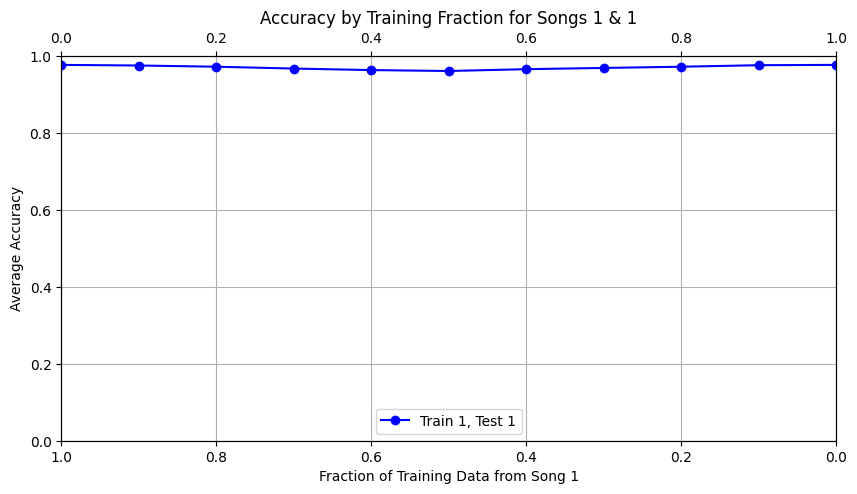

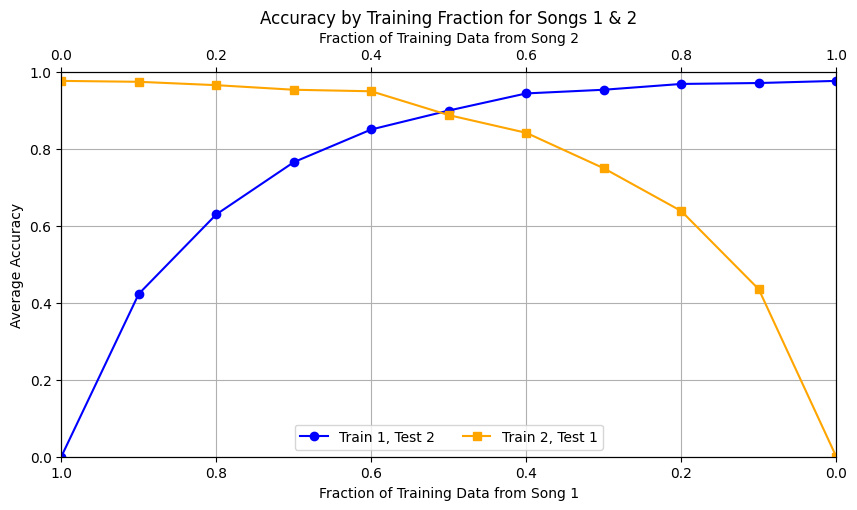

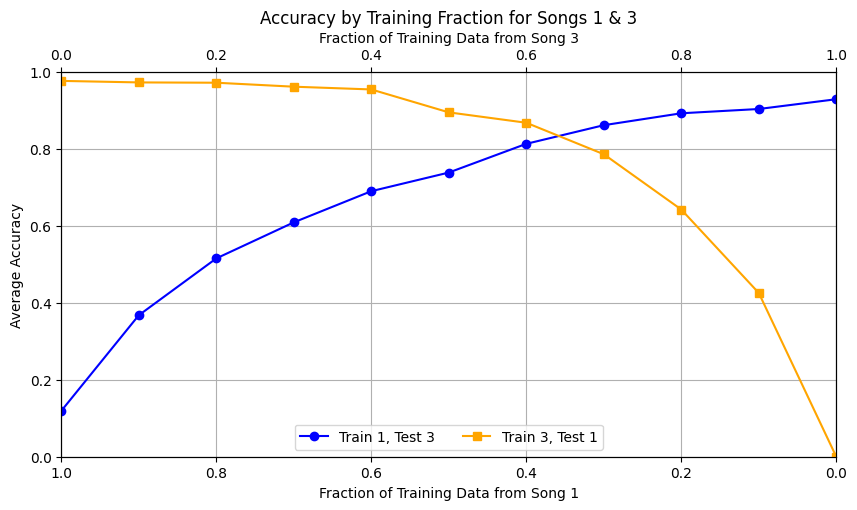

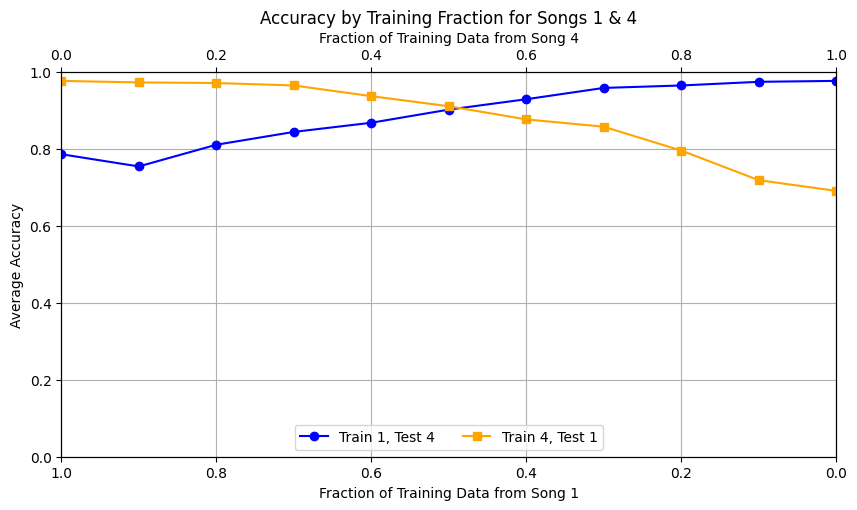

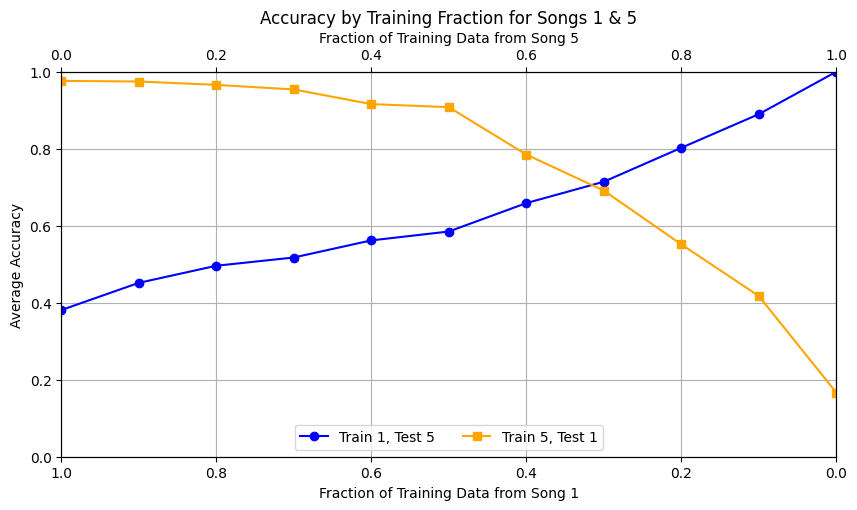

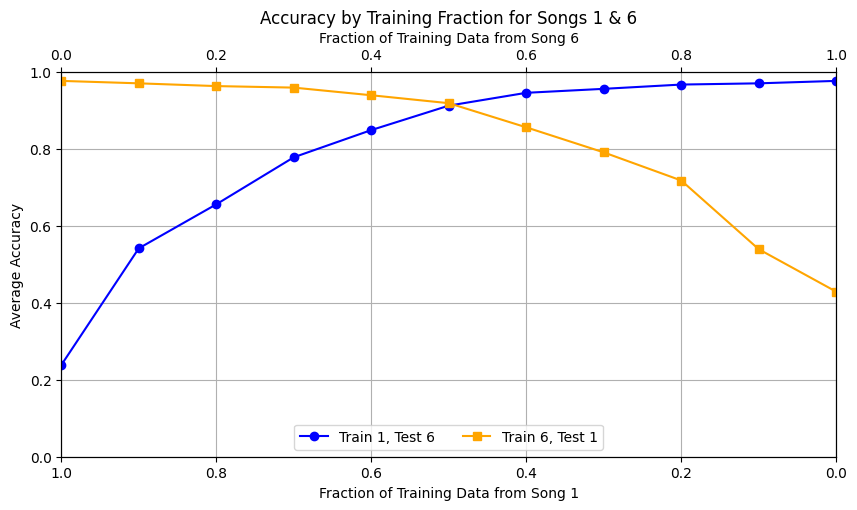

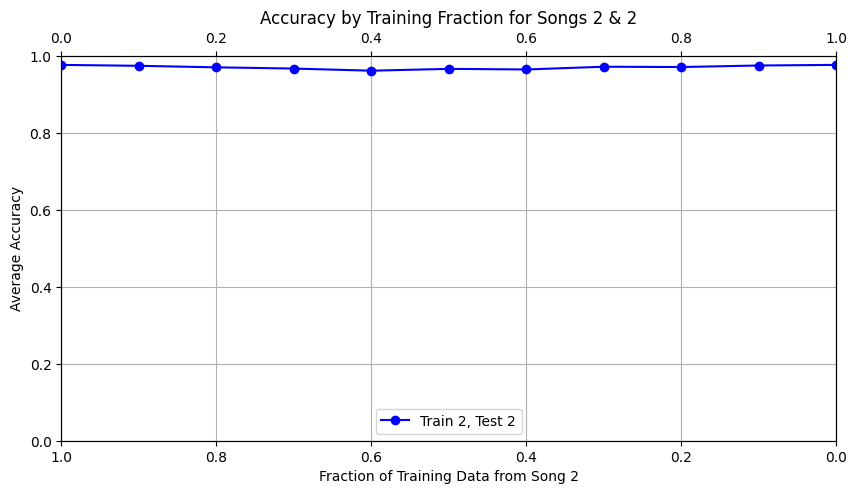

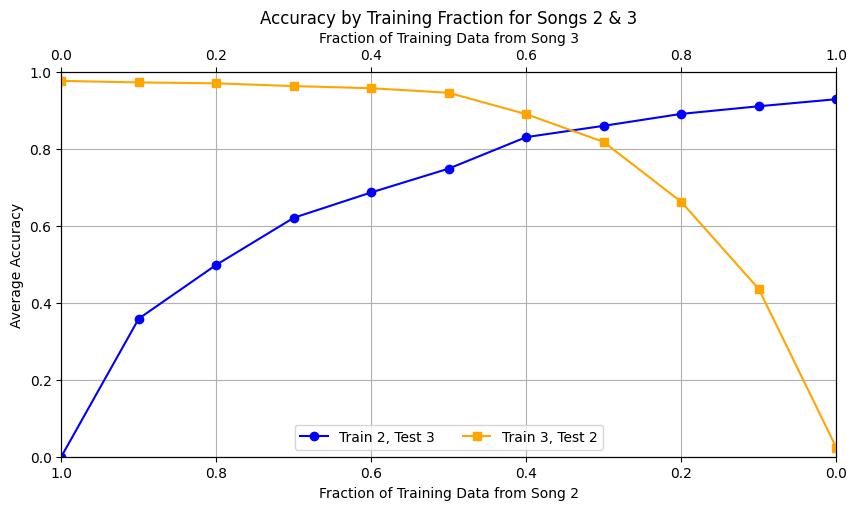

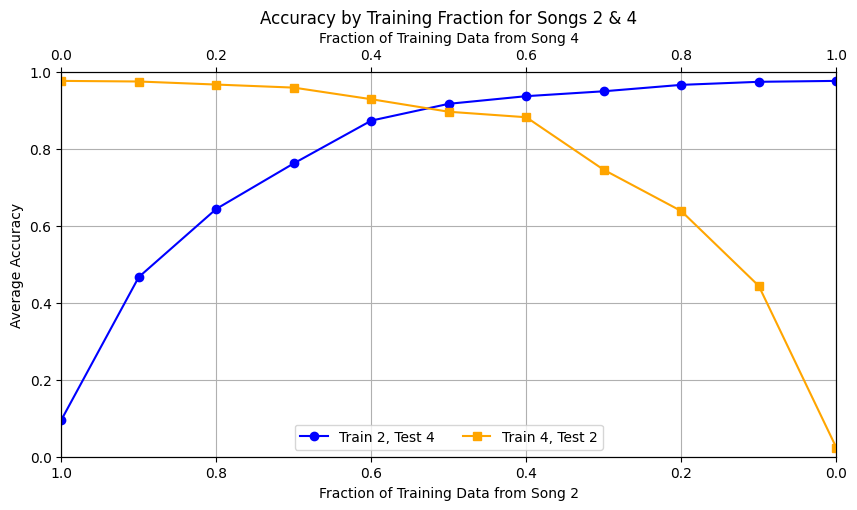

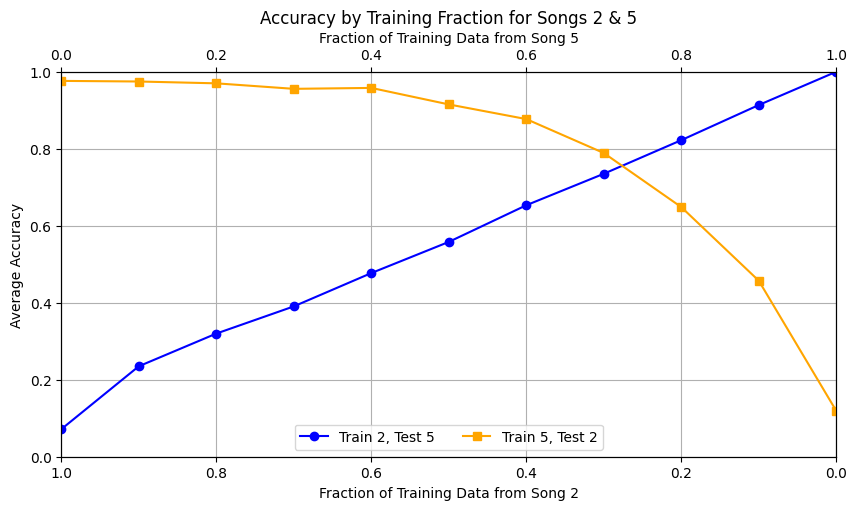

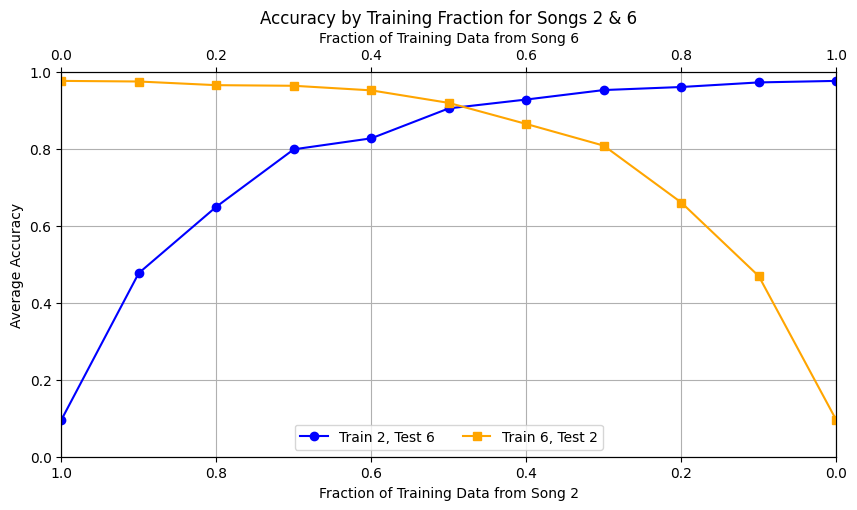

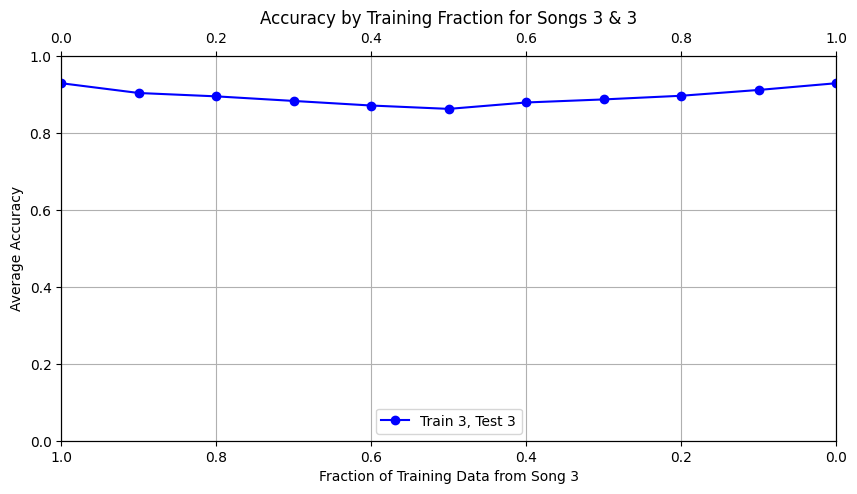

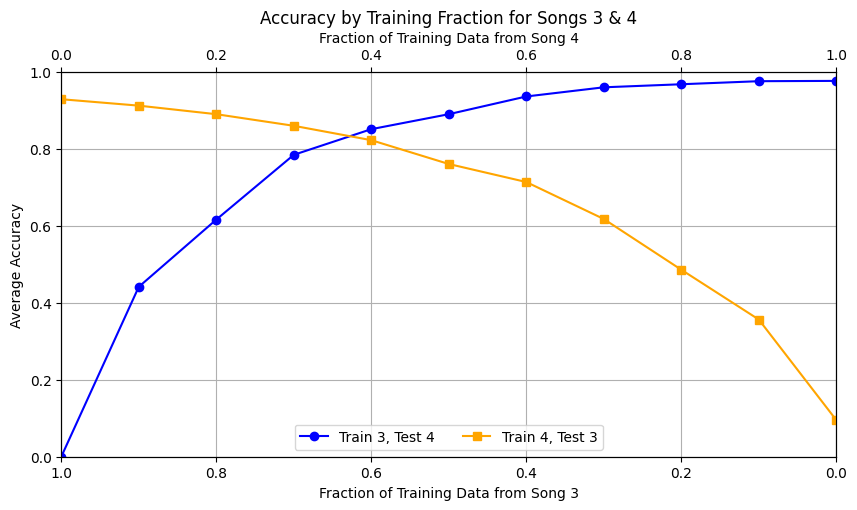

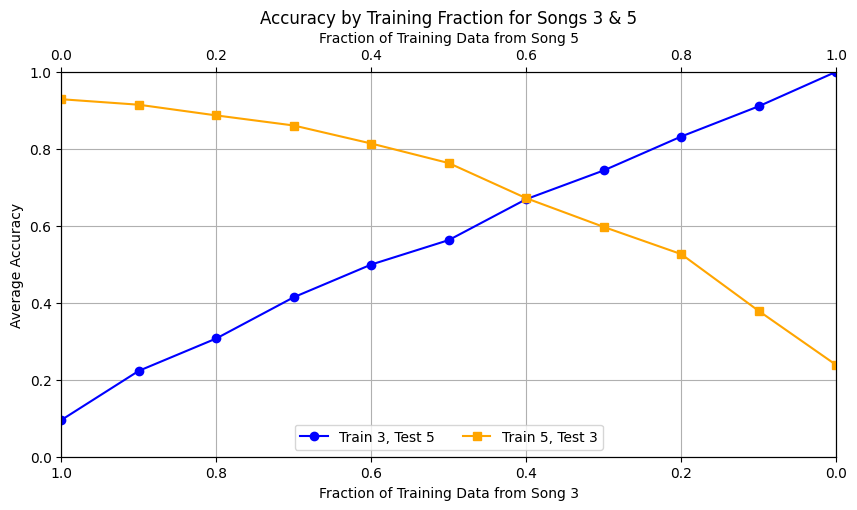

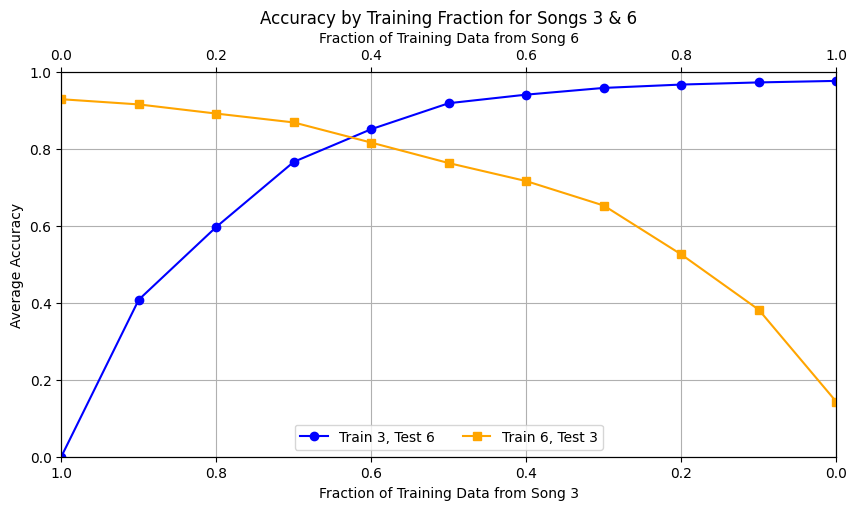

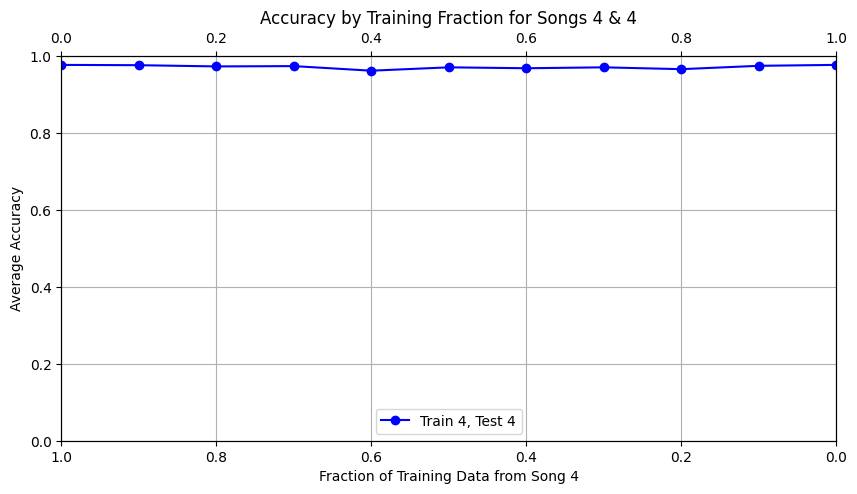

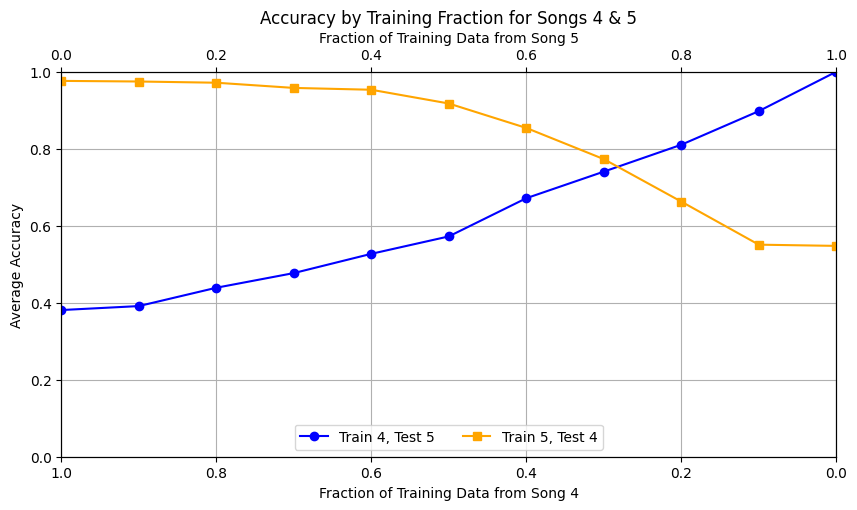

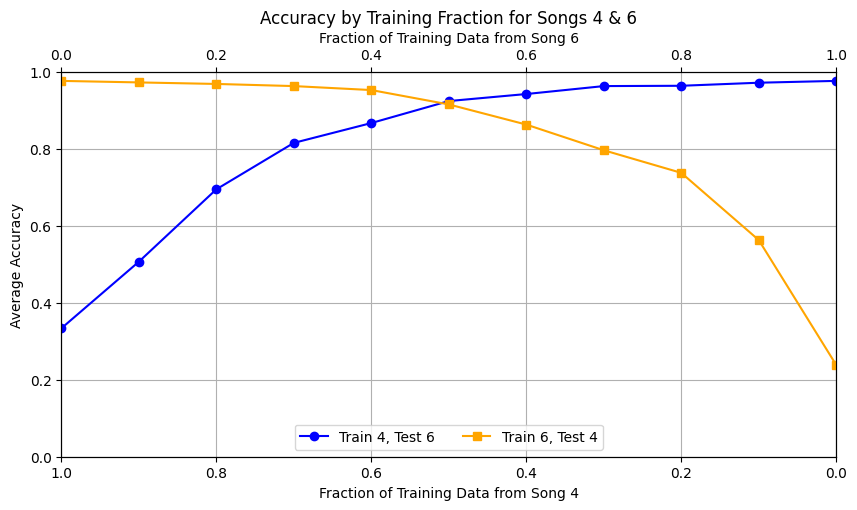

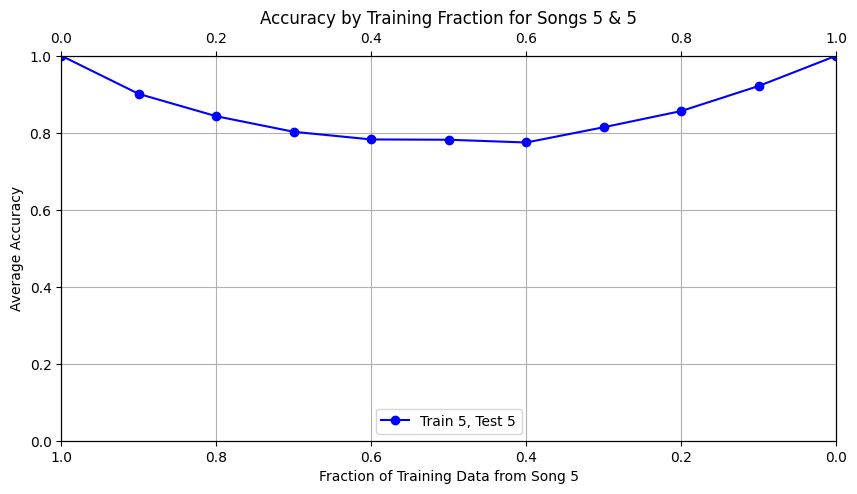

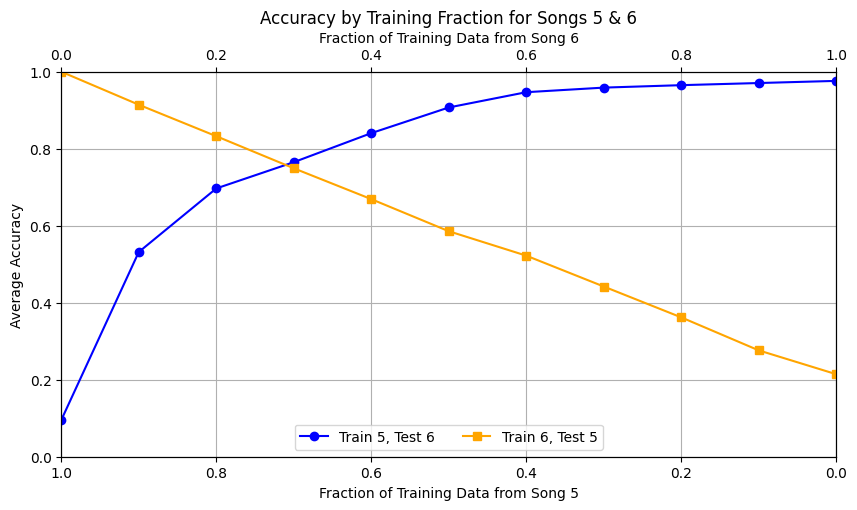

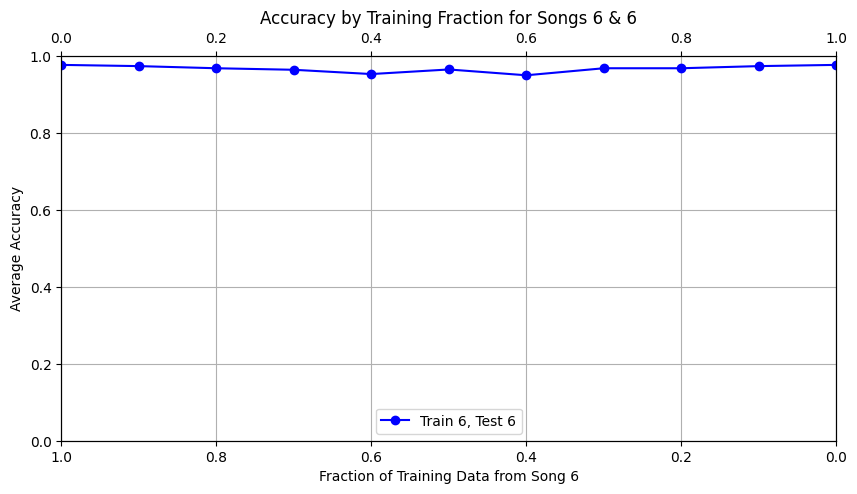

In [270]:
import matplotlib.pyplot as plt

# Organizing data for plotting by unordered pairs
plot_data = {}
for (train_idx, test_idx, fraction), accuracy in results.items():
    pair_label = tuple(sorted([train_idx, test_idx]))  # Create an unordered pair
    if pair_label not in plot_data:
        plot_data[pair_label] = {}
    order_label = f"Train {train_idx}, Test {test_idx}"
    if order_label not in plot_data[pair_label]:
        plot_data[pair_label][order_label] = ([], [])
    plot_data[pair_label][order_label][0].append(fraction)
    plot_data[pair_label][order_label][1].append(accuracy)

# Plotting data for each unordered pair
for pair, data in plot_data.items():
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    # Initialize the secondary axis regardless
    ax2 = ax1.twiny()

    # Set the y-axis limit to [0, 1] for all plots
    ax1.set_ylim([0, 1])

    # Sort data by fraction and plot for each training order within the pair
    for order_label, (fractions, accuracies) in data.items():
        sorted_data = sorted(zip(fractions, accuracies))  # Sort data by fraction
        fractions, accuracies = zip(*sorted_data)

        # Check the training index to determine which axis to plot on and set colors
        if "Train " + str(pair[0]) in order_label:
            # Plot for the first song in the pair on ax1
            ax1.plot(fractions, accuracies, 'o-', color='blue', label=order_label)
            ax1.set_xlabel(f'Fraction of Training Data from Song {pair[0]}')
            ax1.set_ylabel('Average Accuracy')
            ax1.set_xlim([1, 0])  # Inverts the x-axis for the first song
        else:
            # Plot for the second song in the pair on ax2
            ax2.plot(fractions, accuracies, 's-', color='orange', label=order_label)
            ax2.set_xlabel(f'Fraction of Training Data from Song {pair[1]}')
            ax2.set_xlim([0, 1])  # Regular order for the second song

    ax1.set_title(f'Accuracy by Training Fraction for Songs {pair[0]} & {pair[1]}')
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='lower center', ncol=2)
    #ax1.legend(lines , labels , loc='lower center', ncol=2)

    ax1.grid(True)
    plt.show()


In [271]:
from collections import defaultdict

# Create a dictionary to hold a dictionary for each song pair
song_pair_dictionaries = defaultdict(dict)

# Populate the song pair dictionaries
for (train_idx, test_idx, fraction), accuracy in results.items():
    key = (train_idx, test_idx)
    if fraction not in song_pair_dictionaries[key]:
        song_pair_dictionaries[key][fraction] = []
    song_pair_dictionaries[key][fraction].append(accuracy)

# Now you have a dictionary of dictionaries, where each key is a song pair (train_idx, test_idx)
# and the value is another dictionary with fractions as keys and accuracies as values

# Example of accessing the data for song pair (1, 2)
song1_song2_results = song_pair_dictionaries[(1, 2)]
print("Results for Song 1 training and Song 2 testing:", song1_song2_results)


# Now you can directly access results for song 1 training and song 2 testing like:
# print(song_1_2_results)


Results for Song 1 training and Song 2 testing: {0.0: [0.9761904761904755], 0.1: [0.97063492063492], 0.2: [0.9682539682539676], 0.3: [0.9531746031746027], 0.4: [0.9436507936507934], 0.5: [0.899206349206349], 0.6: [0.8499999999999999], 0.7: [0.7650793650793649], 0.8: [0.6293650793650793], 0.9: [0.42301587301587307], 1.0: [0.0]}


In [273]:
song_pair_dictionaries[(1, 4)]

{0.0: [0.9761904761904755],
 0.1: [0.9738095238095231],
 0.2: [0.9642857142857137],
 0.3: [0.9579365079365074],
 0.4: [0.9285714285714283],
 0.5: [0.9015873015873014],
 0.6: [0.8674603174603175],
 0.7: [0.8436507936507933],
 0.8: [0.8103174603174602],
 0.9: [0.7539682539682537],
 1.0: [0.7857142857142857]}

In [274]:
song_pair_dictionaries[(4, 1)]

{0.0: [0.9761904761904755],
 0.1: [0.9722222222222215],
 0.2: [0.97063492063492],
 0.3: [0.9642857142857137],
 0.4: [0.9365079365079362],
 0.5: [0.91031746031746],
 0.6: [0.8761904761904761],
 0.7: [0.857142857142857],
 0.8: [0.795238095238095],
 0.9: [0.7182539682539681],
 1.0: [0.6904761904761901]}

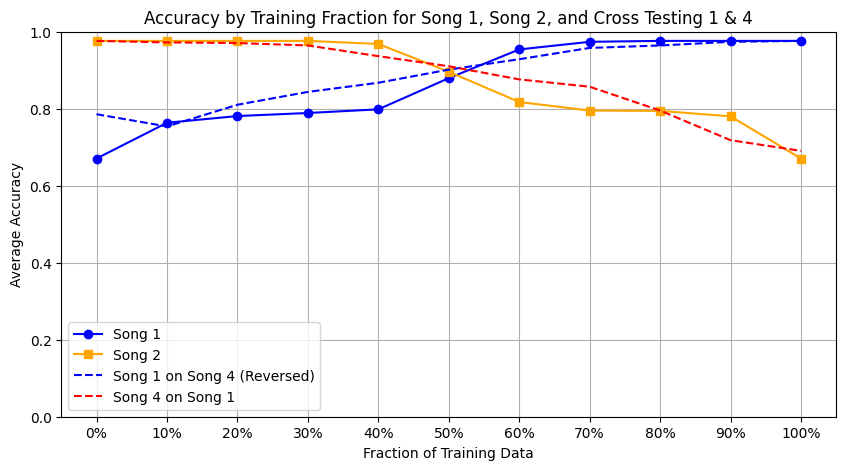

In [278]:
import matplotlib.pyplot as plt

# Define the fractions and their corresponding accuracies for Song 1 and Song 2
fractions = [0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00]
accuracies_song1 = [0.6706, 0.7635, 0.7810, 0.7889, 0.7984, 0.8794, 0.9540, 0.9738, 0.9762, 0.9762, 0.9762]
accuracies_song2 = [0.9762, 0.9762, 0.9762, 0.9762, 0.9683, 0.8960, 0.8175, 0.7952, 0.7944, 0.7802, 0.6706]

# Assuming song_pair_dictionaries holds these values as shown
accuracies_song1_on_song4 = [value[0] for value in song_pair_dictionaries[(1, 4)].values()]
accuracies_song4_on_song1 = [value[0] for value in song_pair_dictionaries[(4, 1)].values()]

# Reverse the order of accuracies for Song 1 on Song 4
accuracies_song1_on_song4 = accuracies_song1_on_song4[::-1]

# Create a plot
plt.figure(figsize=(10, 5))

# Plot accuracies for Song 1 and Song 2
plt.plot(fractions, accuracies_song1, marker='o', color='blue', label='Song 1')
plt.plot(fractions, accuracies_song2, marker='s', color='orange', label='Song 2')

# Plot additional accuracies with dotted lines
plt.plot(fractions, accuracies_song1_on_song4, 'b--', label='Song 1 on Song 4 (Reversed)')
plt.plot(fractions, accuracies_song4_on_song1, 'r--', label='Song 4 on Song 1')

# Adding titles and labels
plt.title('Accuracy by Training Fraction for Song 1, Song 2, and Cross Testing 1 & 4')
plt.xlabel('Fraction of Training Data')
plt.ylabel('Average Accuracy')
plt.xticks(fractions, [f"{int(frac*100)}%" for frac in fractions])  # Showing percentage on x-axis

# Set y-axis limits starting from 0
plt.ylim([0, 1])  # Ensures that the y-axis starts from 0 and goes up to 1

# Add a legend to the plot
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()


In [279]:
song_pair_dictionaries[(1, 2)]

{0.0: [0.9761904761904755],
 0.1: [0.97063492063492],
 0.2: [0.9682539682539676],
 0.3: [0.9531746031746027],
 0.4: [0.9436507936507934],
 0.5: [0.899206349206349],
 0.6: [0.8499999999999999],
 0.7: [0.7650793650793649],
 0.8: [0.6293650793650793],
 0.9: [0.42301587301587307],
 1.0: [0.0]}

In [280]:
song_pair_dictionaries[(2, 1)]

{0.0: [0.9761904761904755],
 0.1: [0.9738095238095231],
 0.2: [0.9650793650793646],
 0.3: [0.9531746031746029],
 0.4: [0.9492063492063488],
 0.5: [0.887301587301587],
 0.6: [0.8412698412698412],
 0.7: [0.7492063492063491],
 0.8: [0.6380952380952379],
 0.9: [0.43492063492063504],
 1.0: [0.0]}

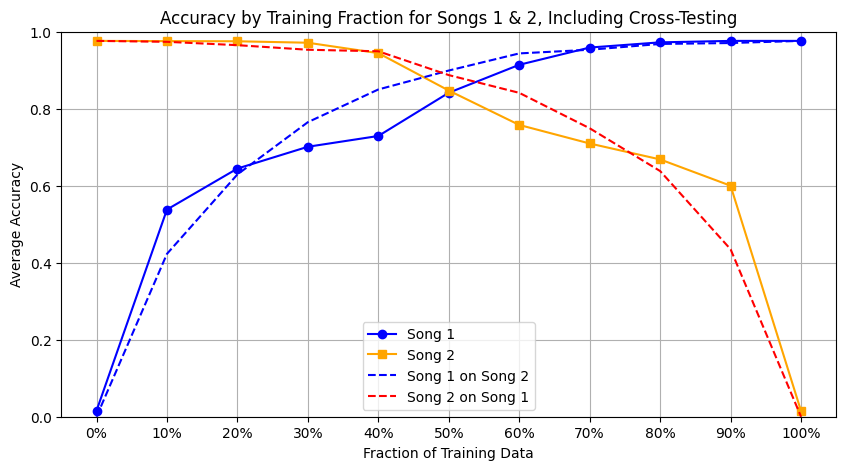

In [282]:
import matplotlib.pyplot as plt

# Define the fractions and their corresponding accuracies for Song 1 and Song 2
fractions = [0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00]
accuracies_song1 = [0.0155, 0.5381, 0.6446, 0.7012, 0.7292, 0.8415, 0.9141, 0.9589, 0.9724, 0.9762, 0.9762]
accuracies_song2 = [0.9762, 0.9756, 0.9752, 0.9714, 0.9444, 0.8472, 0.7579, 0.7097, 0.6683, 0.6000, 0.0147]

# Assuming song_pair_dictionaries holds these values as shown
accuracies_song1_on_song2 = [value[0] for value in song_pair_dictionaries[(1, 2)].values()]
accuracies_song2_on_song1 = [value[0] for value in song_pair_dictionaries[(2, 1)].values()]
accuracies_song1_on_song2 = accuracies_song1_on_song2[::-1]

# Create a plot
plt.figure(figsize=(10, 5))

# Plot accuracies for Song 1 and Song 2
plt.plot(fractions, accuracies_song1, marker='o', color='blue', label='Song 1')
plt.plot(fractions, accuracies_song2, marker='s', color='orange', label='Song 2')

# Plot additional accuracies with dotted lines for cross testing
plt.plot(fractions, accuracies_song1_on_song2, 'b--', label='Song 1 on Song 2')
plt.plot(fractions, accuracies_song2_on_song1, 'r--', label='Song 2 on Song 1')

# Adding titles and labels
plt.title('Accuracy by Training Fraction for Songs 1 & 2, Including Cross-Testing')
plt.xlabel('Fraction of Training Data')
plt.ylabel('Average Accuracy')
plt.xticks(fractions, [f"{int(frac*100)}%" for frac in fractions])  # Showing percentage on x-axis

# Set y-axis limits starting from 0
plt.ylim([0, 1])  # Ensures that the y-axis starts from 0 and goes up to 1

# Add a legend to the plot
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()
